In [ ]:
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Create a specific directory for this project
project_path = '/content/drive/MyDrive/Glacier_Project'
rgi_path = os.path.join(project_path, 'RGI_Data')
dcm_path = os.path.join(project_path, 'DLR_DCM_Data')

# Create folders if they don't exist
os.makedirs(rgi_path, exist_ok=True)
os.makedirs(dcm_path, exist_ok=True)

print(f"Project Directory Created: {project_path}")

Mounted at /content/drive
Project Directory Created: /content/drive/MyDrive/Glacier_Project


📍 Applying Bounding Box: Lon[88.0, 97.5] Lat[26.5, 29.8]
✅ Loaded Raw Data. Total Glaciers: 18587
✅ Filtered Count (Sikkim/Bhutan/AP): 6479 glaciers
💾 Saved CLEAN shapefile to: /content/drive/MyDrive/Glacier_Project/RGI_Data/sikkim_bhutan_arunachal_clean.shp


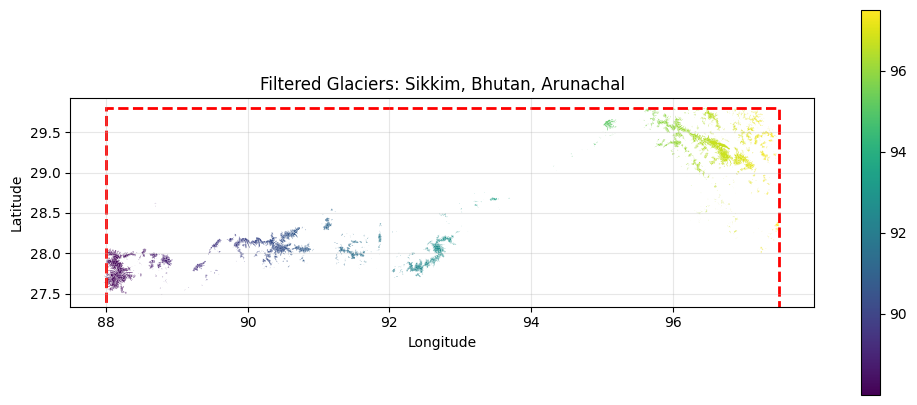

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# --- CONFIGURATION ---
# 1. Define the Input/Output Paths
raw_path = '/content/drive/MyDrive/Glacier_Project/RGI_Data/RGI2000-v7.0-G-15_south_asia_east/RGI2000-v7.0-G-15_south_asia_east.shp'
save_path = '/content/drive/MyDrive/Glacier_Project/RGI_Data/sikkim_bhutan_arunachal_clean.shp'

# 2. Define the "Overall Box" (Sikkim + Bhutan + Arunachal)
# This box strictly captures the filtered region.
MIN_LON = 88.0  # West border of Sikkim (Removes Nepal)
MAX_LON = 97.5  # East border of Arunachal
MIN_LAT = 26.5  # Southern foothills
MAX_LAT = 29.8  # Northern High Himalayas (Removes deep Tibet)

print(f"📍 Applying Bounding Box: Lon[{MIN_LON}, {MAX_LON}] Lat[{MIN_LAT}, {MAX_LAT}]")

# --- EXECUTION ---
if os.path.exists(raw_path):
    # Load Data
    all_glaciers = gpd.read_file(raw_path)
    print(f"✅ Loaded Raw Data. Total Glaciers: {len(all_glaciers)}")

    # Standardize column names to lowercase (Handles RGI 6 vs 7 differences)
    all_glaciers.columns = map(str.lower, all_glaciers.columns)

    # FILTERING: Apply the Bounding Box Conditions
    my_glaciers = all_glaciers[
        (all_glaciers['cenlon'] >= MIN_LON) &
        (all_glaciers['cenlon'] <= MAX_LON) &
        (all_glaciers['cenlat'] >= MIN_LAT) &
        (all_glaciers['cenlat'] <= MAX_LAT)
    ].copy()

    print(f"✅ Filtered Count (Sikkim/Bhutan/AP): {len(my_glaciers)} glaciers")

    # Save the Clean Shapefile
    my_glaciers.to_file(save_path)
    print(f"💾 Saved CLEAN shapefile to: {save_path}")

    # Plot for Verification
    f, ax = plt.subplots(1, 1, figsize=(12, 5))
    my_glaciers.plot(ax=ax, markersize=3, column='cenlon', cmap='viridis', legend=True)

    # Draw the bounding box on the map for visual confirmation
    rect = plt.Rectangle((MIN_LON, MIN_LAT), MAX_LON-MIN_LON, MAX_LAT-MIN_LAT,
                         linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
    ax.add_patch(rect)

    ax.set_title("Filtered Glaciers: Sikkim, Bhutan, Arunachal")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print(f"❌ Error: Could not find file at {raw_path}")